In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer 
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, concatenate, LSTM, Bidirectional, Dropout, GRU
from tensorflow.keras.models import Model
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [66]:
df_static = pd.read_csv('../data/application_train.csv',index_col=0)

In [2]:
df_static = pd.read_csv('../treated_data/df_static2.csv',index_col=0)

Random under-sampling:
0    24825
1    24825
Name: TARGET, dtype: int64


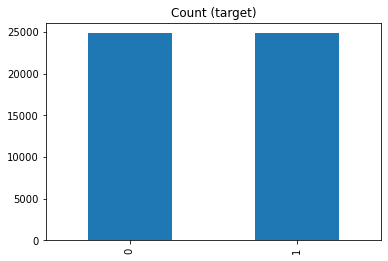

In [68]:
count_0, count_1 = df_static.TARGET.value_counts()
df_class_0 = df_static[df_static['TARGET'] == 0]
df_class_1 = df_static[df_static['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_1, random_state=42)
df_static = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_static.TARGET.value_counts())

df_static.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [3]:
df_static = pd.get_dummies(df_static, drop_first=True )

In [12]:
X_train, X_test, y_train, y_test  = train_test_split(df_static.index ,df_static.TARGET, test_size=0.33, random_state=42, shuffle=True)

In [13]:
X_static_train = df_static.loc[X_train]
X_static_train = X_static_train.fillna(X_static_train.mean()).iloc[:,1:]

X_static_test = df_static.loc[X_test]
X_static_test = X_static_test.fillna(X_static_train.mean()).iloc[:,1:]

In [16]:
scaler = MinMaxScaler()
X_static_train_sc = scaler.fit_transform(X_static_train)
X_static_test_sc = scaler.transform(X_static_test)

In [7]:
X_static_train_sc.shape

(33265, 186)

In [37]:
X_static_train_sc.max()

1.0

In [38]:
X_static_test_sd.max()

2.714285714285714

In [25]:
input_x = Input(shape=186)
x = Dense(100, activation = 'relu')(input_x)
x = Dropout(0.2)(x)
x = Dense(50, activation = 'relu')(x)
out = Dense(1, activation = 'sigmoid')(x)

model = Model(input_x, out)

In [26]:
opt = tf.keras.optimizers.SGD(lr=0.003)
m = tf.keras.metrics.AUC(num_thresholds=100)

In [27]:
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics = [m])

In [28]:
history = model.fit(X_static_train_sc, y_train, validation_data=(X_static_test_sc, y_test), epochs=100)

Epoch 1/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6903 - auc_2: 0.5476 - val_loss: 0.6812 - val_auc_2: 0.6102
Epoch 2/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6780 - auc_2: 0.6071 - val_loss: 0.6706 - val_auc_2: 0.6471
Epoch 3/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6688 - auc_2: 0.6331 - val_loss: 0.6606 - val_auc_2: 0.6644
Epoch 4/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6604 - auc_2: 0.6512 - val_loss: 0.6526 - val_auc_2: 0.6760
Epoch 5/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6528 - auc_2: 0.6653 - val_loss: 0.6441 - val_auc_2: 0.6865
Epoch 6/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6455 - auc_2: 0.6777 - val_loss: 0.6373 - val_auc_2: 0.6954
Epoch 7/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.6407 - auc_2: 0.6851 - val_loss: 0.6317 - val_auc_2: 0.7036
Epoch 8/100
1040/1040 [====

1040/1040 [==============================] - 2s 2ms/step - loss: 0.5967 - auc_2: 0.7446 - val_loss: 0.6018 - val_auc_2: 0.7392
Epoch 60/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.5981 - auc_2: 0.7432 - val_loss: 0.6013 - val_auc_2: 0.7392
Epoch 61/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.5966 - auc_2: 0.7449 - val_loss: 0.6015 - val_auc_2: 0.7391
Epoch 62/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.5967 - auc_2: 0.7447 - val_loss: 0.6014 - val_auc_2: 0.7392
Epoch 63/100
1040/1040 [==============================] - 3s 2ms/step - loss: 0.5973 - auc_2: 0.7440 - val_loss: 0.6013 - val_auc_2: 0.7391
Epoch 64/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.5967 - auc_2: 0.7445 - val_loss: 0.6013 - val_auc_2: 0.7391
Epoch 65/100
1040/1040 [==============================] - 2s 2ms/step - loss: 0.5968 - auc_2: 0.7446 - val_loss: 0.6013 - val_auc_2: 0.7391
Epoch 66/100
1040/1040 [=========

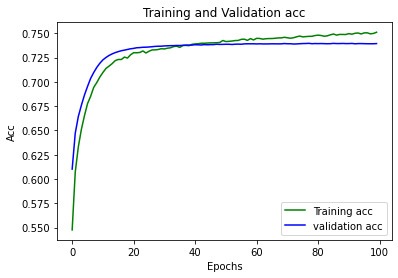

In [29]:
loss_train = history.history['auc_2']
loss_val = history.history['val_auc_2']
epochs = range(100)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [22]:
import matplotlib.pyplot as plt